In [73]:
import pandas as pd

In [74]:
df = pd.read_csv(r'C:\Users\sunilkumar\Downloads\Salary_Data[1].csv',usecols=['Age','Gender','Education Level','Job Title','Years of Experience','Salary'])

In [75]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,15.0,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


In [76]:
df = df[df['Job Title']=='Data Analyst']

In [77]:
df = df[(df['Education Level']=="Bachelor's") | (df['Education Level']=="Master's")]

In [78]:
df['Education Level'].unique()

array(["Master's", "Bachelor's"], dtype=object)

In [79]:
df.drop(['Job Title'],axis=1,inplace=True)

In [80]:
df

,Age,Gender,Education Level,Years of Experience,Salary
1,28,Female,Master's,3.0,65000.0
81,41,Female,Master's,13.0,80000.0
376,27,Female,Bachelor's,2.0,110000.0
380,25,Female,Master's,1.0,100000.0
384,30,Female,Bachelor's,5.0,145000.0
...,...,...,...,...,...
1182,27,Female,Bachelor's,5.0,125000.0
1185,29,Male,Bachelor's,7.0,130000.0
1190,26,Male,Bachelor's,3.0,110000.0
1193,29,Female,Bachelor's,7.0,130000.0


In [81]:
df.reset_index(drop = True,inplace = True)

In [82]:
df

,Age,Gender,Education Level,Years of Experience,Salary
0,28,Female,Master's,3.0,65000.0
1,41,Female,Master's,13.0,80000.0
2,27,Female,Bachelor's,2.0,110000.0
3,25,Female,Master's,1.0,100000.0
4,30,Female,Bachelor's,5.0,145000.0
...,...,...,...,...,...
271,27,Female,Bachelor's,5.0,125000.0
272,29,Male,Bachelor's,7.0,130000.0
273,26,Male,Bachelor's,3.0,110000.0
274,29,Female,Bachelor's,7.0,130000.0


In [83]:
df.shape

(276, 5)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  276 non-null    int64  
 1   Gender               276 non-null    object 
 2   Education Level      276 non-null    object 
 3   Years of Experience  276 non-null    float64
 4   Salary               276 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.9+ KB


In [85]:
df.describe()

,Age,Years of Experience,Salary
count,276.000000,276.000000,276.000000
mean,26.659420,3.663043,125050.724638
std,2.639549,2.731409,33478.747118
min,23.000000,1.000000,65000.000000
25%,25.000000,2.000000,100000.000000
50%,26.000000,3.000000,120000.000000
75%,29.000000,5.000000,130000.000000
max,41.000000,13.000000,195000.000000


In [86]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
dtype: int64

In [87]:
df.corr(numeric_only=True)

,Age,Years of Experience,Salary
Age,1.000000,0.944853,0.834962
Years of Experience,0.944853,1.000000,0.895439
Salary,0.834962,0.895439,1.000000


In [88]:
import seaborn as sns

<Axes: >

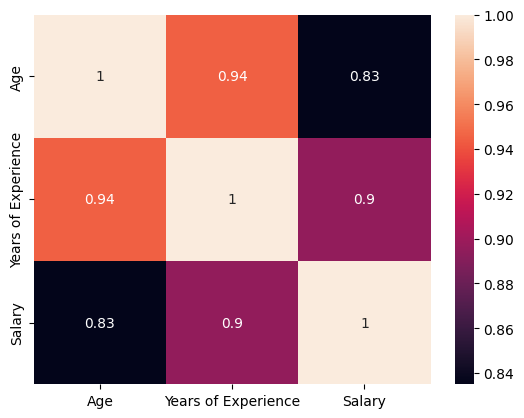

In [89]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [90]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [91]:
fig = make_subplots(rows=2,cols=2)

In [92]:
fig.add_trace(go.Scatter(x=df['Age'], y=df['Salary'],mode ='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Gender'], y=df['Salary'],mode ='markers'), row=1, col=2)
fig.add_trace(go.Scatter(x=df['Education Level'], y=df['Salary'],mode ='markers'), row=2, col=1)
# fig.add_trace(go.Scatter(x=df['Job Title'], y=df['Salary'],mode ='markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['Years of Experience'], y=df['Salary'],mode ='markers'), row=2, col=2)

In [93]:
X = df.iloc[:, :-1]    # Independent varibles
y = df.iloc[:, -1]   # dependent variable
print(X)
print(y)

     Age  Gender Education Level  Years of Experience
0     28  Female        Master's                  3.0
1     41  Female        Master's                 13.0
2     27  Female      Bachelor's                  2.0
3     25  Female        Master's                  1.0
4     30  Female      Bachelor's                  5.0
..   ...     ...             ...                  ...
271   27  Female      Bachelor's                  5.0
272   29    Male      Bachelor's                  7.0
273   26    Male      Bachelor's                  3.0
274   29  Female      Bachelor's                  7.0
275   25  Female      Bachelor's                  2.0

[276 rows x 4 columns]
0       65000.0
1       80000.0
2      110000.0
3      100000.0
4      145000.0
         ...   
271    125000.0
272    130000.0
273    110000.0
274    130000.0
275     90000.0
Name: Salary, Length: 276, dtype: float64


In [94]:
X.isna().any()

Age                    False
Gender                 False
Education Level        False
Years of Experience    False
dtype: bool

In [95]:
X['Education Level'].unique()

array(["Master's", "Bachelor's"], dtype=object)

In [96]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
encoded = ohe.fit_transform(X[['Gender','Education Level']]).toarray()
# print(encoded)

# enc = OneHotEncoder(drop='first') # drop the first dummy variable (K-1)
ohe_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
print(ohe_df.shape)
print(X.shape)
X = pd.concat([X, ohe_df], axis=1)

# enc_df = pd.DataFrame(enc.fit_transform(X[['Gender','Education Level']]).toarray())
# enc_df.columns = ['Male',"Bachelor's Degree", "Master's","Master's Degree"]
# merge with main df on key values
# X = X.join(enc_df)
X.head()

(276, 4)
(276, 4)


,Age,Gender,Education Level,Years of Experience,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's
0,28,Female,Master's,3.0,1.0,0.0,0.0,1.0
1,41,Female,Master's,13.0,1.0,0.0,0.0,1.0
2,27,Female,Bachelor's,2.0,1.0,0.0,1.0,0.0
3,25,Female,Master's,1.0,1.0,0.0,0.0,1.0
4,30,Female,Bachelor's,5.0,1.0,0.0,1.0,0.0


In [97]:
encoded

array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       ...,
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.]])

In [98]:
X.shape

(276, 8)

In [99]:
X = X.drop(['Gender','Education Level'], axis=1)
X.head()

,Age,Years of Experience,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's
0,28,3.0,1.0,0.0,0.0,1.0
1,41,13.0,1.0,0.0,0.0,1.0
2,27,2.0,1.0,0.0,1.0,0.0
3,25,1.0,1.0,0.0,0.0,1.0
4,30,5.0,1.0,0.0,1.0,0.0


In [100]:
X.fillna(0,inplace = True)
y.shape

(276,)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(193, 6)
(83, 6)
(193,)
(83,)


In [102]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # Instatiate LinearREgression object
regressor.fit(X_train, y_train) # fit the model

LinearRegression()

In [103]:
import joblib
joblib.dump(regressor, 'my_model_MLR.pkl')

['my_model_MLR.pkl']

In [104]:
regressor.coef_

array([ -759.3371387 , 11406.34477801, -4538.63838868,  4538.63838868,
        6349.52532578, -6349.52532578])

In [105]:
regressor.intercept_

96213.97837529967

In [106]:
y_pred = regressor.predict(X_test)
y_pred

array([101854.12640103,  77748.73097145, 100284.39553907, 141353.75181895,
       101854.12640103, 101854.12640103, 101043.73267777, 121578.41081771,
       100284.39553907, 141353.75181895, 121578.41081771, 186219.7937923 ,
       164925.77851367, 121578.41081771, 131743.10630673,  77748.73097145,
       100284.39553907, 101854.12640103, 112501.13404034,  77748.73097145,
       100284.39553907, 101854.12640103, 112501.13404034, 121578.41081771,
       109412.728901  , 186219.7937923 , 101043.73267777, 101854.12640103,
       109412.728901  , 121578.41081771, 111690.74031709, 121578.41081771,
       101854.12640103, 101854.12640103, 111690.74031709, 101854.12640103,
       101854.12640103, 141353.75181895, 121578.41081771, 121578.41081771,
       144442.15695829, 121578.41081771, 101854.12640103, 110931.40317839,
       101854.12640103, 111690.74031709, 121578.41081771, 100284.39553907,
        77748.73097145, 101854.12640103, 121578.41081771, 100284.39553907,
       111690.74031709, 1

In [107]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
184,110000.0,101854.126401
15,100000.0,77748.730971
55,90000.0,100284.395539
74,160000.0,141353.751819
188,110000.0,101854.126401
...,...,...
71,195000.0,186219.793792
238,190000.0,186219.793792
210,190000.0,186219.793792
265,130000.0,164925.778514


In [108]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7533239727099751